In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from cycler import cycler
from matplotlib import rcParams
from matplotlib.cm import get_cmap

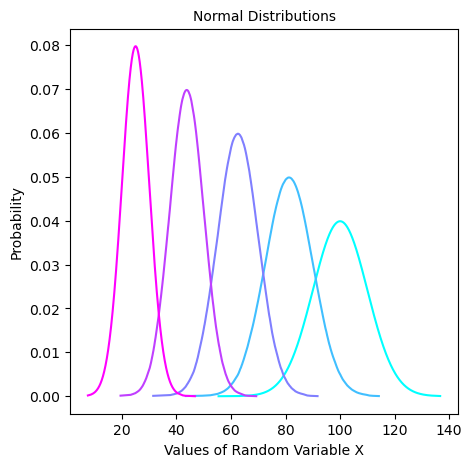

In [50]:
mu_1, sigma_1 = 25, 5 # mean and standard deviation
mu_2, sigma_2 = 100, 10 # mean and standard deviation
num_samples = 10000 # num samples

plt.figure(figsize=(5,5))

# Distribution 1
x1 = np.random.normal(mu_1, sigma_1, num_samples)
y1 = stats.norm.pdf(x1, mu_1, sigma_1)
x1, y1 = zip(*sorted(zip(x1, y1)))

# Distribution 2
x2 = np.random.normal(mu_2, sigma_2, num_samples)
y2 = stats.norm.pdf(x2, mu_2, sigma_2)
x2, y2 = zip(*sorted(zip(x2, y2)))

# Optimal transport ~ minimum Wasserstein distance, in this case consider points in order
p1 = np.vstack((x1,y1))
p2 = np.vstack((x2,y2))
transport = p1 - p2

# Lambdas
lambdas = [0, 0.25, 0.5, 0.75, 1.0]

# Colors
cmap = get_cmap('cool')
colors = []

# Generate and plot interpolated samples alongside distributions 1 and 2
for lamb in lambdas:
    z = lamb * p1 + (1-lamb) * p2
    colors.append(cmap(lamb))
    plt.plot(z[0,:], z[1,:])

rcParams['axes.prop_cycle'] = cycler(color=colors)
plt.title('Normal Distributions', fontsize='10')
plt.xlabel('Values of Random Variable X', fontsize='10')
plt.ylabel('Probability', fontsize='10')
plt.show()